In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set()

In [105]:
# Get data - covid info from NYT and zip code to county code (FIP) mapping from HUD
# HUD: https://www.huduser.gov/portal/datasets/usps_crosswalk.html
# NYT: https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

zips_and_fips = pd.read_csv('zip-to-fips.csv')
og_data = pd.read_csv('nyt-covid-data.csv')
# Note that ~30% of counties are missing from NYT covid data!

def zip_to_fips(zipcode):
    
    fip = zips_and_fips[zips_and_fips['ZIP'] == zipcode].iloc[0]['COUNTY']
    
    return fip

def get_county_data(my_fips):
    my_data = og_data[og_data.fips == my_fips]
    
    county_name = my_data['county'].unique()
    
    if len(county_name) > 1:
        raise ValueError('something is wrong - found more than one matching county')
    
    my_filtered_data = my_data[['date', 'cases', 'deaths']]
    
    
    return {
        'county': county_name[0],
        'data': my_filtered_data
    }

def zip_to_data(zip):
    """Returns dict with two values: 'county' has the name of the county, 'data' has a df with
    date, cases to date, and deaths to date"""
    
    fips = zip_to_fips(zip)
    data = get_county_data(fips)
    
    return data

def get_county_data_from_name(fullname):
    my_data = og_data[og_data.fullname == fullname]
    
    county_name = my_data['county'].unique()
    
    if len(county_name) > 1:
        raise ValueError('something is wrong - found more than one matching county')
    
    my_filtered_data = my_data[['date', 'cases', 'deaths']]
    
    
    return my_filtered_data

In [106]:
# Get data - covid info from NYT and zip code to county code (FIP) mapping from HUD
# HUD: https://www.huduser.gov/portal/datasets/usps_crosswalk.html
# NYT: https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

zips_and_fips = pd.read_csv('zip-to-fips.csv')
og_data = pd.read_csv('nyt-covid-data.csv')
# Note that ~30% of counties are missing from NYT covid data!

In [107]:
og_data['fullname'] = og_data['county'] + ' County, ' + og_data['state']

In [114]:
def get_more_details_from_name(fullname):
    """get date of most recent entry, number of deaths on that date"""
    my_data = og_data[og_data.fullname == fullname]

    most_recent_date = my_data['date'].max()
#     deaths = my_data[my_data.date == most_recent_date]['deaths'].item()
    cases = my_data[my_data.date == most_recent_date]['cases'].item()

    return(most_recent_date, cases)

In [115]:
get_more_details_from_name('San Francisco County, California')

('2020-07-16', 4863)

In [116]:
my_data = get_county_data_from_name('San Francisco County, California')

most_recent_date = my_data['date'].max()
deaths = my_data[my_data.date == most_recent_date]['deaths'].item()
cases = my_data[my_data.date == most_recent_date]['cases'].item()

print(most_recent_date)
print(deaths)
print(cases)

2020-07-16
51
4863


In [112]:
test = my_data[my_data.date == most_recent_date]['deaths'].item()

In [113]:
test

51

In [ ]:
zip_code = 94022

result = zip_to_data(zip_code)
county_name = result['county']
county_data = result['data']

In [26]:
options=[
    {'label': 'New York City County, New York', 'value': 'New York City County, New York'},
    {'label': 'Santa Clara County, California', 'value': 'Santa Clara County, California'},
    {'label': 'San Francisco County, California', 'value': 'San Francisco County, California'}
]

In [32]:
all_fullnames = []

for name in og_data['fullname'].unique():
    dict_entry = {'label': name, 'value': name}
    all_fullnames.append(dict_entry)

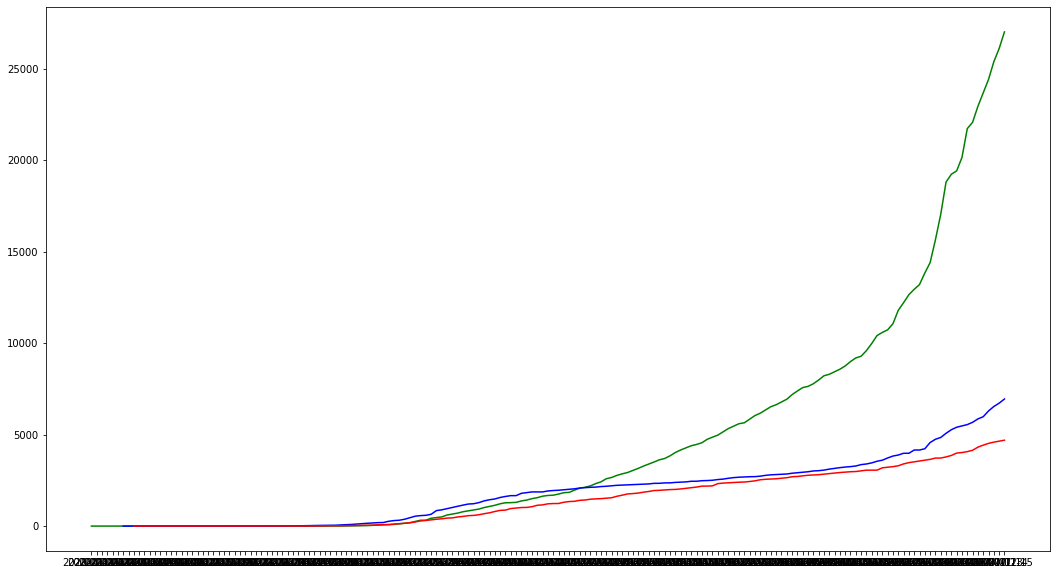

In [69]:
santa_clara = zip_to_data(94022)['data']
san_francisco = zip_to_data(94114)['data']
orange_county = zip_to_data(92646)['data']
tulsa = zip_to_data(74133)['data']


plt.figure(figsize=(18, 10))
plt.plot(orange_county['date'], orange_county['cases'], color='green')
plt.plot(santa_clara['date'], santa_clara['cases'], color='blue')
plt.plot(san_francisco['date'], san_francisco['cases'], color='red')
plt.show()